<a href="https://colab.research.google.com/github/Siobhan-C/OMDS-ModB2-Curran-Peer-Review/blob/main/OMDS-ModB2-Week6-Curran-Siobhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

**Answer:** What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs? How would you adjust the graphs shown to improve the presentation?

There are advantages and disadvantages to showing this as a plot vs. two separate line graphs, such as:

Area plot:
* Advantages: Shows cumulative effects and overall magnitude with immediate visual impact.
* Disadvantages: Overlapping areas can obscure individual nutrient trends and precise values.

Separate line graphs:
* Advantages: Clearly display individual fluctuations and anomalies.
* Disadvantages: Require mental effort to see the combined overall picture.


I would adjust the graphs to shown in the following ways to improve presentation:
* I'd use transparency and distinct contrasting colors.
* On the separate line graphs, I'd consider aligning the axes / dual-axis design.
* Add clear annotations and explanations.



In [50]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


<ipython-input-51-cb98afaf59c2>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

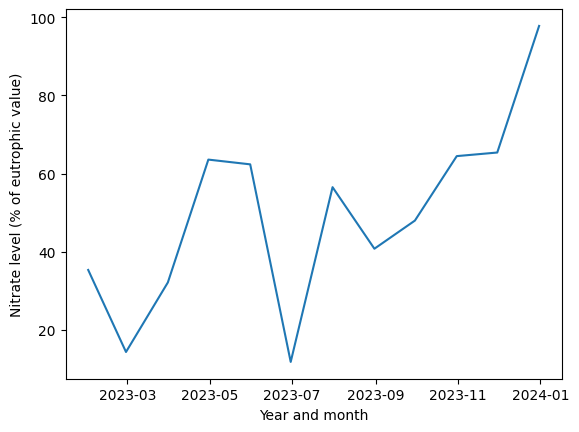

In [51]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

<ipython-input-52-d7e7201a7d15>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

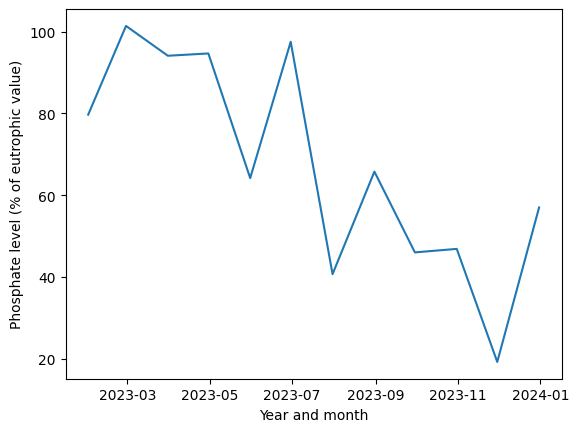

In [52]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

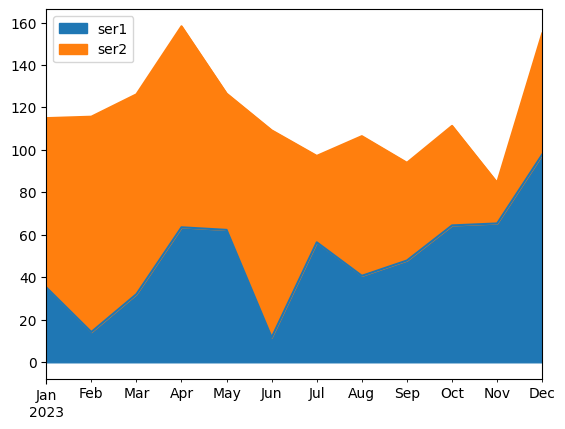

In [53]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

# #3 Answer:

Data Source:
URL: https://insideairbnb.com/get-the-data/

Country/City: Austin

File Name: listings-2.csv

Using this one of the three datasets due to size (it is smaller; Colab is encountering difficulties uploading the larger files).


In [54]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Load the CSV file
df = pd.read_csv('/content/drive/My Drive/austinHousingData.csv')
# Display the first 5 rows of the DataFrame
print(df.head())

         zpid          city          streetAddress  zipcode  \
0   111373431  pflugerville   14424 Lake Victor Dr    78660   
1   120900430  pflugerville     1104 Strickling Dr    78660   
2  2084491383  pflugerville    1408 Fort Dessau Rd    78660   
3   120901374  pflugerville     1025 Strickling Dr    78660   
4    60134862  pflugerville  15005 Donna Jane Loop    78660   

                                         description   latitude  longitude  \
0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673 -97.661697   
2  Under construction - estimated completion in A...  30.409748 -97.639771   
3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   

   propertyTaxRate  garageSpaces  hasAssociation  ...  numOfMiddleSchools  \
0             1.98             2            True  ...                   1  

In [56]:
#get/print summary of statistics
print(df.describe())

               zpid       zipcode      latitude     longitude  \
count  1.517100e+04  15171.000000  15171.000000  15171.000000   
mean   1.044193e+08  78735.932964     30.291596    -97.778532   
std    3.179426e+08     18.893475      0.096973      0.084715   
min    2.858495e+07  78617.000000     30.085030    -98.022057   
25%    2.941115e+07  78727.000000     30.203313    -97.838009   
50%    2.949441e+07  78739.000000     30.284416    -97.769539   
75%    7.033762e+07  78749.000000     30.366585    -97.717903   
max    2.146313e+09  78759.000000     30.517323    -97.569504   

       propertyTaxRate  garageSpaces  parkingSpaces     yearBuilt  \
count     15171.000000  15171.000000   15171.000000  15171.000000   
mean          1.994085      1.229187       1.224507   1988.554743   
std           0.053102      1.352117       1.352732     21.579458   
min           1.980000      0.000000       0.000000   1905.000000   
25%           1.980000      0.000000       0.000000   1974.000000   


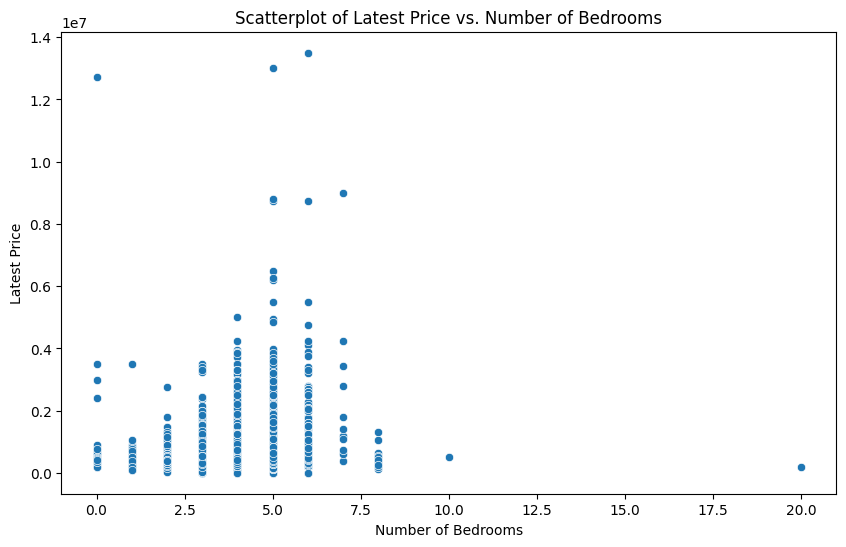

In [57]:
#scatter plots example --
#used to identify correlations between two different continuous variables
#generate  scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='numOfBedrooms', y='latestPrice')
plt.title('Scatterplot of Latest Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Latest Price')
plt.show()

In [58]:
#had to update code as non-numeric data values were being pulled in, resulting in an error
#slect only numeric columns
numeric_df = df.select_dtypes(include=['number'])
#calc correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                                zpid   zipcode  latitude  longitude  \
zpid                        1.000000 -0.052805 -0.055352   0.005886   
zipcode                    -0.052805  1.000000 -0.036440  -0.126135   
latitude                   -0.055352 -0.036440  1.000000   0.347597   
longitude                   0.005886 -0.126135  0.347597   1.000000   
propertyTaxRate            -0.011396 -0.172846  0.450187  -0.013746   
garageSpaces               -0.001927 -0.016600  0.019153  -0.115317   
parkingSpaces              -0.001410 -0.016687  0.018222  -0.114713   
yearBuilt                   0.213280 -0.016143 -0.116519  -0.252537   
latestPrice                 0.007503 -0.145946  0.071547  -0.184079   
numPriceChanges            -0.049541 -0.043115  0.013402  -0.050127   
latest_salemonth            0.012119  0.000116 -0.001667  -0.004023   
latest_saleyear             0.053438 -0.011057 -0.042536  -0.018003   
numOfPhotos                -0.012489 -0.011971  0.046059  -0.107296   
numOfA

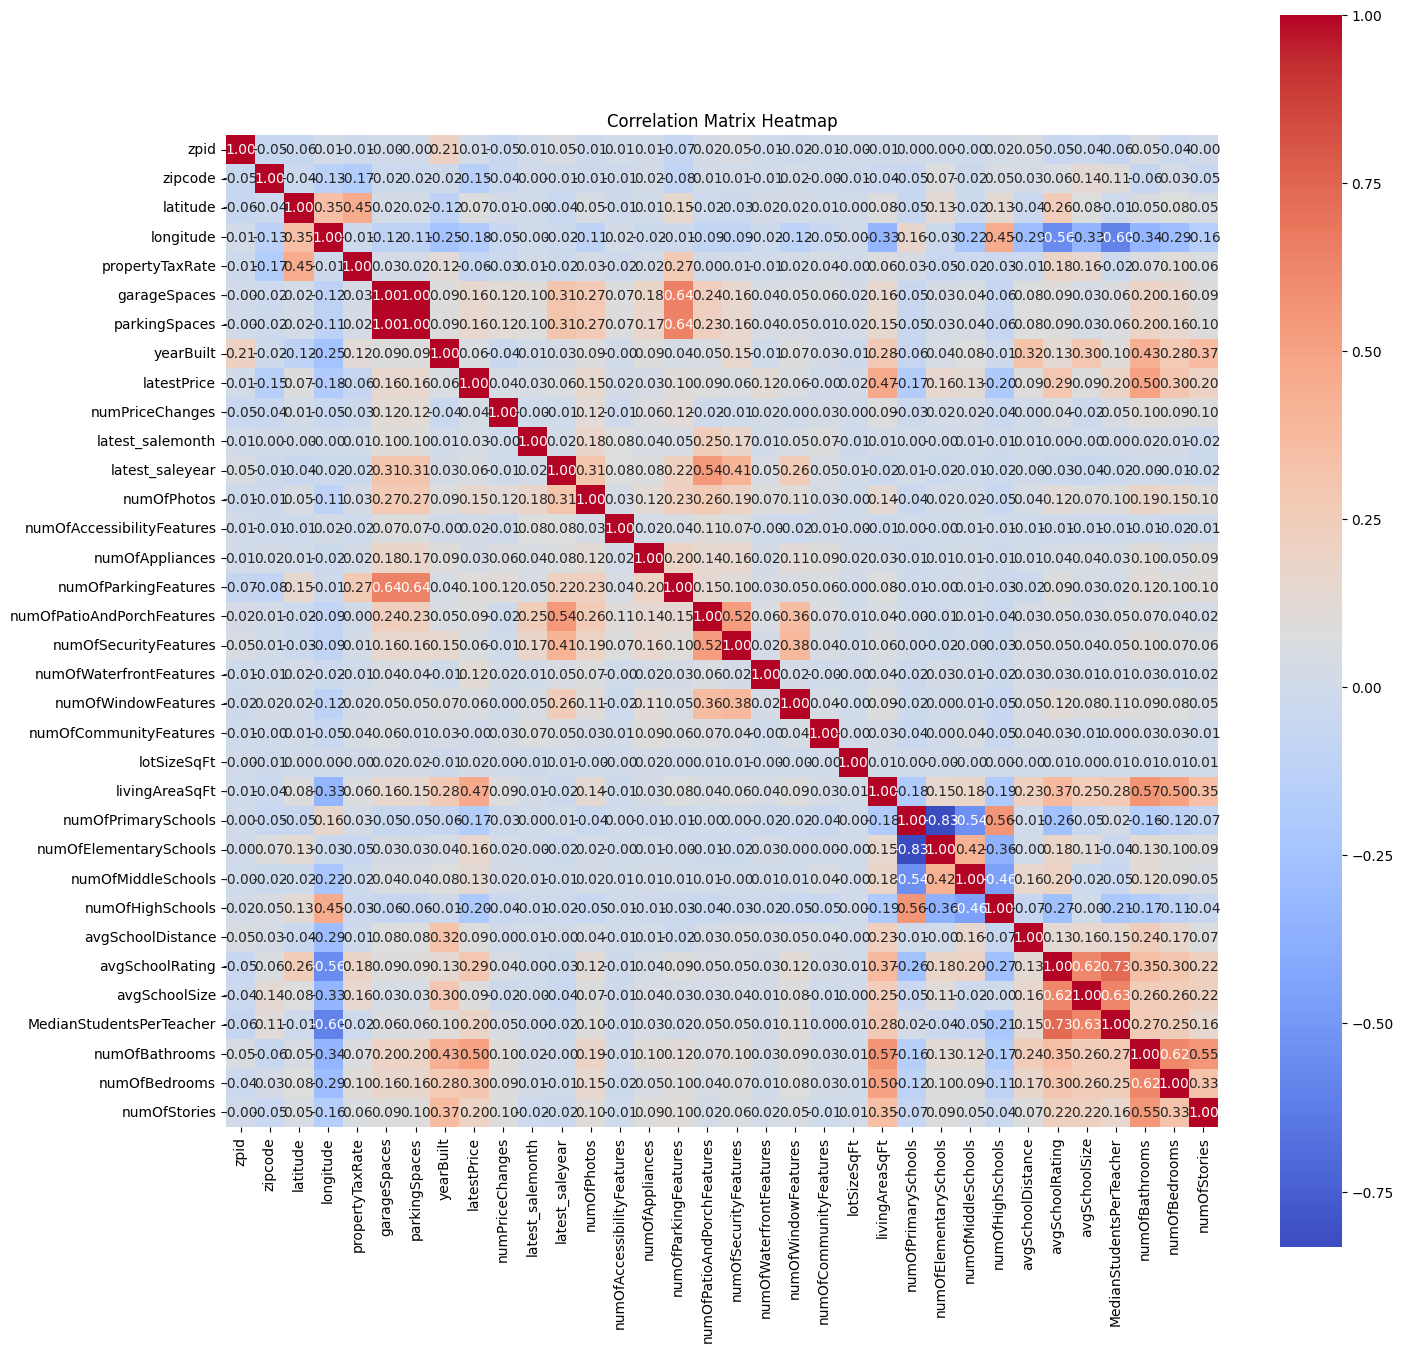

In [59]:
#heatmap / correlation matrix example --
#shows how things are corralated to each other with color coded representation of the data -- this allows the viewer to identify strong and weak corralations in one view.
# Set the size of the heatmap
plt.figure(figsize=(16, 20))
#create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

#title & show plot
plt.title('Correlation Matrix Heatmap')
plt.show()

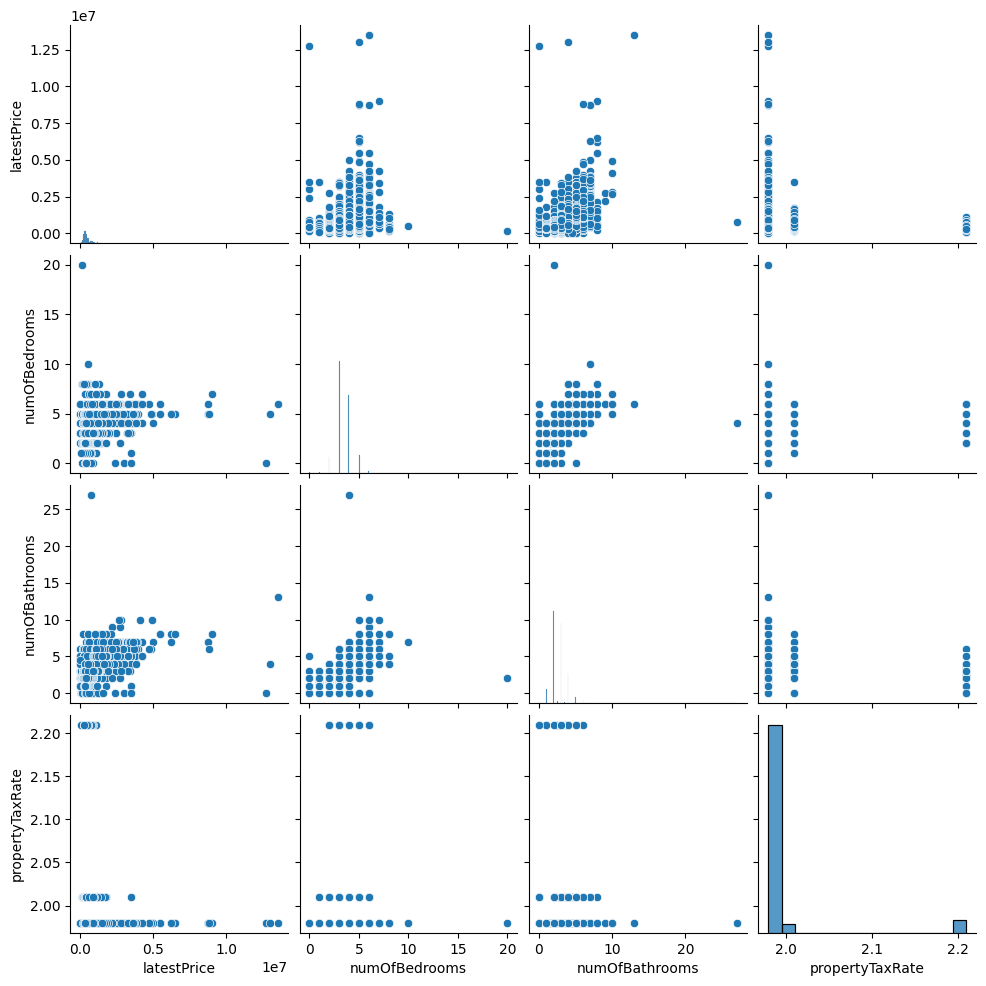

In [60]:
#pairplot example --
#this type of graph helps the reader view the relationships between different variables in one view.
#helps show how different features interact with eachother
#create a pairplot for selected numeric columns
sns.pairplot(numeric_df[['latestPrice', 'numOfBedrooms', 'numOfBathrooms', 'propertyTaxRate']])
plt.show()

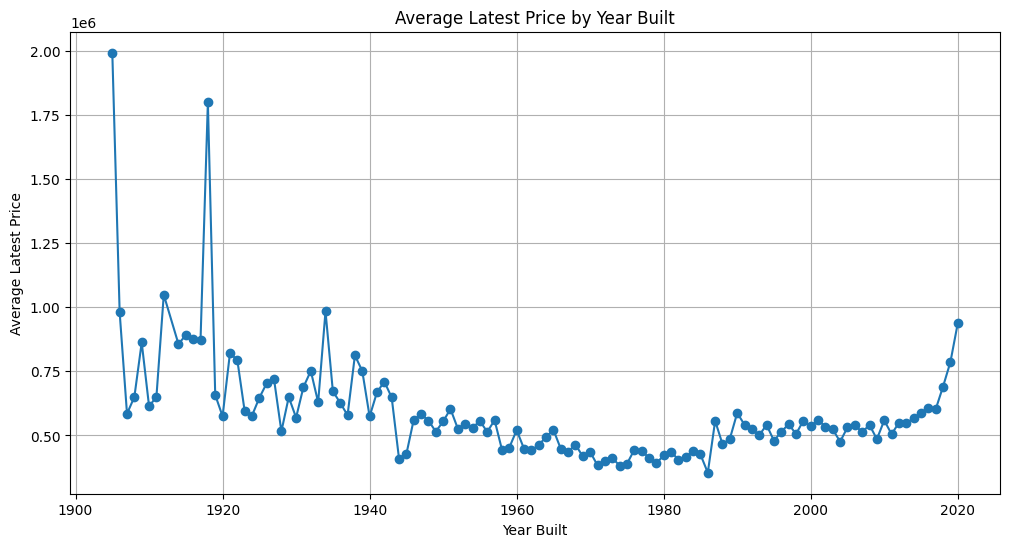

In [61]:
#line graph example --
#beneficial when there is time related dated as we can show trends over time.
#goup by yearBuilt and calc the average latestPrice
avg_price_per_year = df.groupby('yearBuilt')['latestPrice'].mean().reset_index()

#create / plt line graph
plt.figure(figsize=(12, 6))
plt.plot(avg_price_per_year['yearBuilt'], avg_price_per_year['latestPrice'], marker='o')
plt.title('Average Latest Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Latest Price')
plt.grid()
plt.show()

# #3 Conclusion:

Analysis and Insights from Outputs
1. Scatterplot: Latest Price vs. Number of Bedrooms
    * Observations: The scatterplot reveals the relationship between the number of bedrooms (numOfBedrooms) and the latest property price (latestPrice). While there is a general trend of higher prices for properties with more bedrooms, the relationship is not strictly linear. Key outliers include:
        * Properties with very high prices (e.g., above $10 million), regardless of the number of bedrooms.
        * Properties with a large number of bedrooms (e.g., 15–20) but relatively low prices. Most data points are clustered around properties with 2–5 bedrooms and prices below $1 million.
    * Insights: Although the number of bedrooms influences property prices, it is not the sole determinant. Other factors, such as location, property size, and amenities, likely play a significant role. Outliers may represent luxury properties or atypical cases that warrant further investigation.
2. Correlation Matrix Heatmap
    * Observations: The heatmap visually represents the correlations between numerical variables in the dataset. Key findings include:
        * A strong positive correlation between numOfBedrooms and numOfBathrooms, which is expected for larger homes.
        * Moderate correlations between latestPrice and variables like livingAreaSqFt and numOfBedrooms, suggesting these features significantly influence property prices.
        * Positive correlations between garageSpaces and parkingSpaces, as these features are naturally related.
        * Weak or negligible correlations between other variables, as indicated by values close to 0.
    * Insights: Highly correlated variables, such as numOfBedrooms and numOfBathrooms, may introduce redundancy in predictive models. Simplifying the model by removing one of these features could improve efficiency. The moderate correlation between latestPrice and features like livingAreaSqFt highlights their importance in predicting property prices. Conversely, weak correlations (e.g., with zipcode) suggest these features may have minimal impact on prices.
3. Outliers
    * Both the scatterplot and heatmap indicate the presence of outliers:
        * In the scatterplot, properties with extremely high prices or an unusually high number of bedrooms stand out.
        * In the heatmap, weak correlations between some variables and latestPrice may indicate noise or irrelevant predictors. Identifying and addressing these outliers is crucial to improving model performance and ensuring accurate predictions.
5. Trends or Patterns Over Time
    * While the scatterplot and heatmap do not directly address time-based trends, analyzing variables like yearBuilt (as in the line graph task) can help identify temporal patterns in property prices. For instance, consistent increases or decreases over time may reflect market trends or inflation effects.
7. Confounding Variables
    * Several potential confounding variables could influence property prices, including:
        * Location: Features like zipcode or latitude/longitude may affect prices, even if their correlations appear weak.
        * Amenities: Variables such as numOfCommunityFeatures or numOfSecurityFeatures may explain variations in prices.
        * Market Conditions: External economic factors, such as interest rates or housing demand, are not included in the dataset but likely play a significant role in price determination.


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

<b>Answer:</b>

I recreated the graph from page 97 of the Decluttering: Step-by-Step chapter.


Since my selected project is in the housing industry, I created a dataset from the housing market and created a graph with data points that I thought would be relevant to the audience. Interest rates, in particular, are a hot topic for anyone in the housing and lending industry. Having worked as a government loan underwriter, I know firsthand how much interest rates influence decisions—they’re a driving factor in everything from affordability to long-term planning.


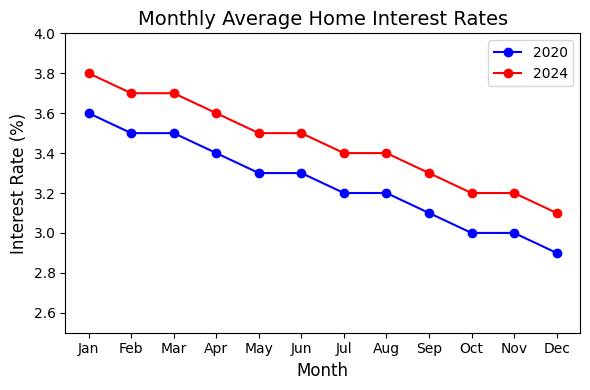

In [62]:
#example data for home interest rates (in %)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

interest_2020 = [3.6, 3.5, 3.5, 3.4, 3.3, 3.3, 3.2, 3.2, 3.1, 3.0, 3.0, 2.9]
interest_2024 = [3.8, 3.7, 3.7, 3.6, 3.5, 3.5, 3.4, 3.4, 3.3, 3.2, 3.2, 3.1]

#create, plot, customize labels, etc
plt.figure(figsize=(6, 4))
plt.plot(months, interest_2020, color='blue', marker='o', label='2020')
plt.plot(months, interest_2024, color='red',  marker='o', label='2024')
plt.title("Monthly Average Home Interest Rates", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.legend()
plt.ylim([2.5, 4.0])
plt.tight_layout()
plt.show()
